 ### Support Vector Machines

In [98]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

## Motivating Support Vector Machines

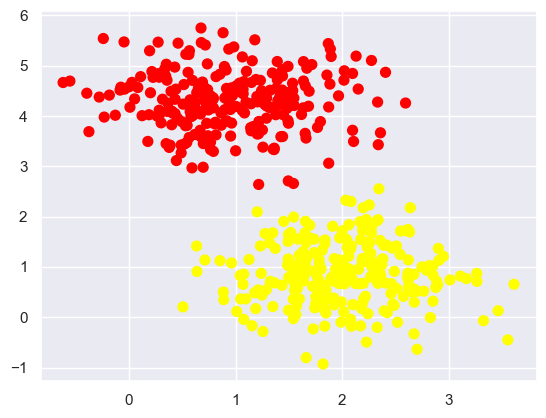

In [99]:
import sklearn.datasets as skd

X, y = skd.make_blobs(n_samples=500, centers=2,
                  random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

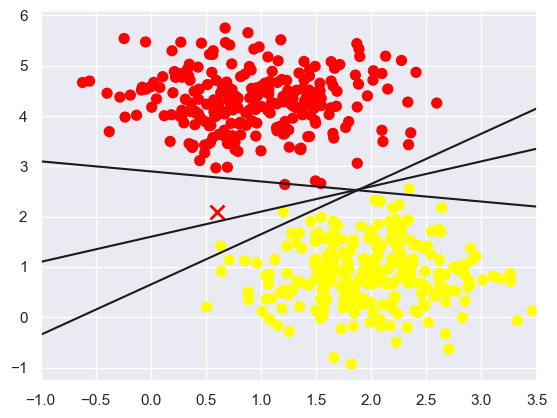

In [100]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

In [101]:
X

array([[ 6.18481655e-01,  4.27224695e+00],
       [ 2.16562282e+00,  6.66369804e-01],
       [ 7.36600661e-01,  4.52582086e+00],
       [ 2.01590279e+00,  4.71448799e+00],
       [ 2.63168356e+00,  1.69510137e+00],
       [ 1.25414828e+00,  4.47124479e+00],
       [ 3.00174593e-01,  3.86538068e+00],
       [ 6.98112494e-01,  4.59267621e+00],
       [ 2.54746060e+00,  1.71363278e+00],
       [ 2.59400451e+00,  4.25943253e+00],
       [ 3.55724373e-01,  4.71274404e+00],
       [ 4.94224280e-01,  3.89005746e+00],
       [-7.72642715e-02,  4.57434800e+00],
       [ 3.32534213e+00, -6.88633821e-02],
       [ 9.99448410e-01,  3.30975827e+00],
       [ 1.91005562e+00,  1.80862036e+00],
       [ 9.66860812e-01,  4.40034423e+00],
       [ 1.07581354e+00,  8.57383167e-01],
       [ 2.06790473e+00,  9.57336334e-01],
       [ 1.07627418e+00,  4.68480619e+00],
       [ 7.67522789e-01,  4.39759671e+00],
       [ 1.65463989e+00,  1.90681670e+00],
       [ 2.35448169e+00,  1.52644695e+00],
       [ 6.

In [102]:
y

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

In [103]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [105]:
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.metrics import accuracy_score


model = SVC(kernel='linear', C=0.01)

model.fit(X_train, y_train)

y_pred=model.predict(X_test)

print('Model accuracy score ',accuracy_score(y_test, y_pred))

Model accuracy score  1.0


In [108]:
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.metrics import accuracy_score


model = SVC(kernel='rbf', C=0.1)

model.fit(X_train, y_train)

y_pred=model.predict(X_test)

print('Model accuracy score ',accuracy_score(y_test, y_pred))

Model accuracy score  1.0


In [107]:
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.metrics import accuracy_score


model = SVC(kernel='poly', C=0.001)

model.fit(X_train, y_train)

y_pred=model.predict(X_test)

print('Model accuracy score ',accuracy_score(y_test, y_pred))

Model accuracy score  0.76


A key to this classifier's success is that for the fit, only the position of the support vectors matter; any points further from the margin which are on the correct side do not modify the fit!
Technically, this is because these points do not contribute to the loss function used to fit the model, so their position and number do not matter so long as they do not cross the margin.

We can see this, for example, if we plot the model learned from the first 60 points and first 120 points of this dataset:

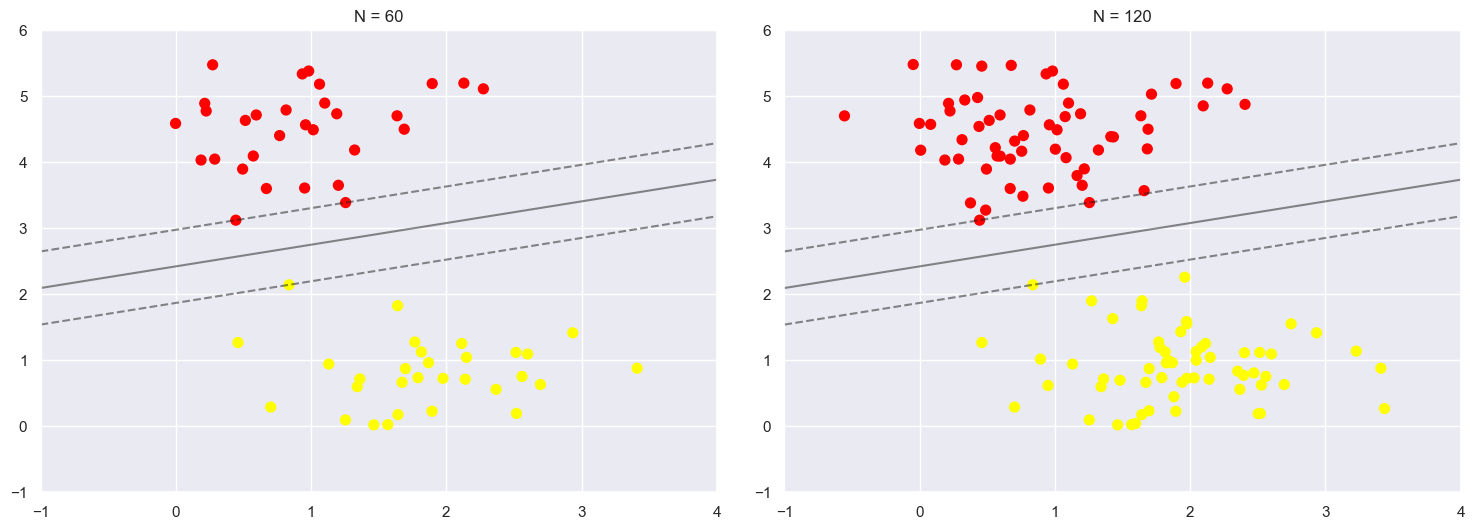

In [109]:
def plot_svm(N=10, ax=None):
    X, y = skd.make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

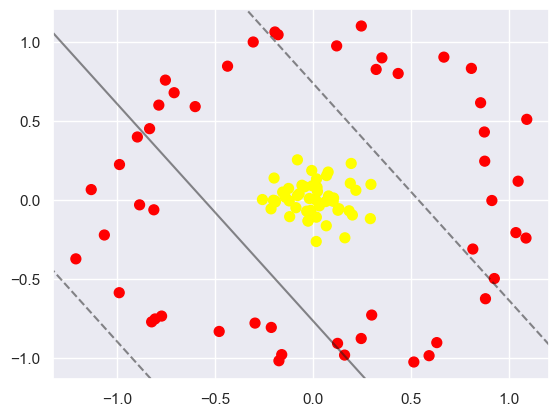

In [110]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [111]:
clf = SVC(kernel='poly', C=1)
clf.fit(X, y)

SVC(C=1, kernel='poly')

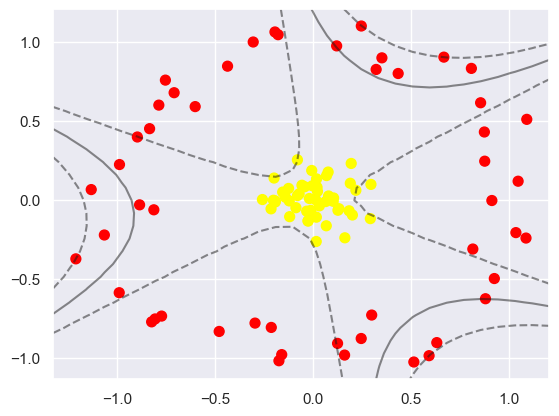

In [112]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

### Tuning the SVM: Softening Margins



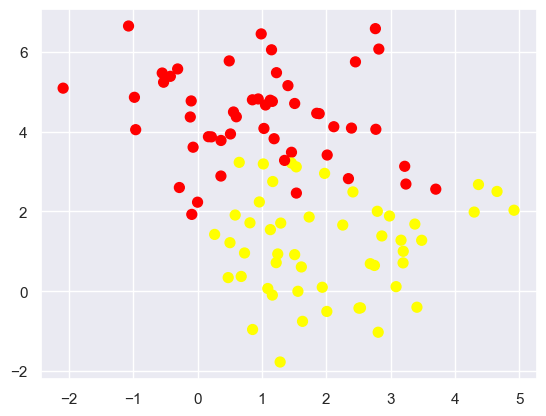

In [113]:
X, y = skd.make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

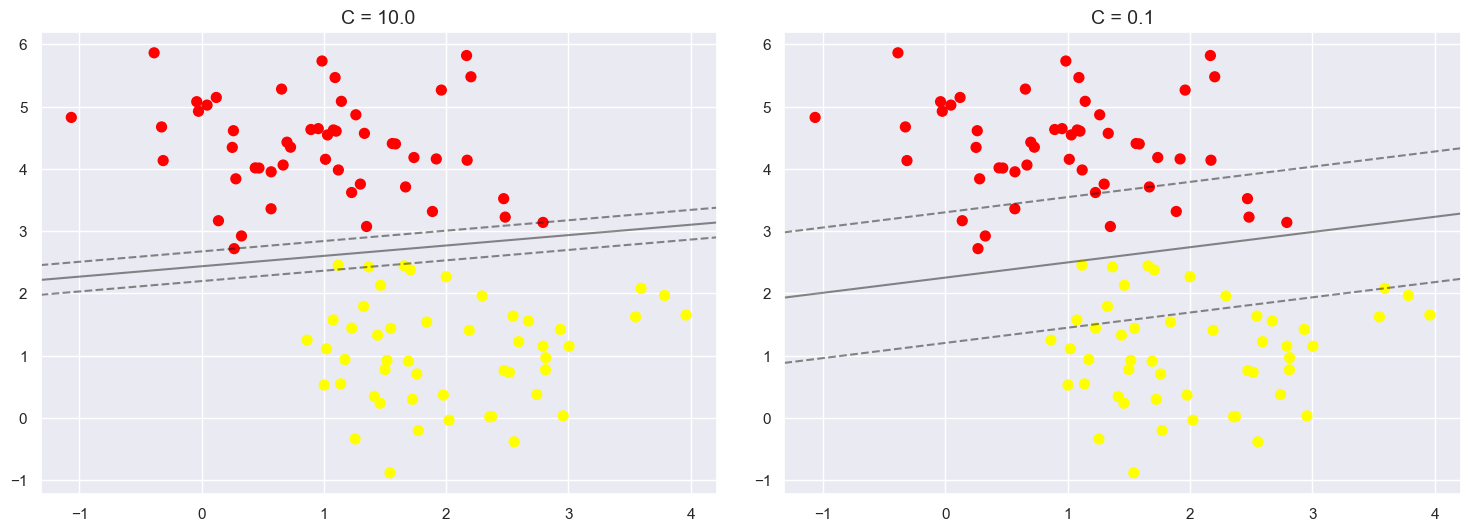

In [114]:
X, y = skd.make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)